In [1]:
from ggplot import *

In [2]:
import os
import numpy as np
import pandas as pd
import scipy as sp

os.chdir("/Users/tesarylin/Box Sync/Data")  


In [3]:
df = pd.read_csv("2011.csv", nrows=2210890, usecols=
        ['machine_id', 'site_session_id', 'domain_id', 'ref_domain_name',
       'pages_viewed', 'duration', 'event_date', 'event_time', 'tran_flg',
       'prod_category_id', 'prod_name', 'prod_qty', 'prod_totprice',
       'basket_tot', 'domain_name'], error_bad_lines=False)

b'Skipping line 1210894: expected 25 fields, saw 26\n'
/Users/tesarylin/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
# Useful to reset index after subsetting if the original one does not carry meaning
df=df.dropna(subset=['tran_flg']).reset_index(drop=True)

In [42]:
df['prod_qty'].value_counts(sort=False)

1.00       2398
2.00        152
3.00         35
4.00         21
5.00          9
6.00         10
7.00          3
8.00          5
9.00          3
10.00        10
12.00         3
14.00         1
15.00         1
16.00         1
18.00         3
20.00         2
22.00         1
26.00         1
28.00         1
29.00         1
30.00         1
41.00         1
47.00         1
50.00         1
58.00         1
64.99         1
66.00         1
75.00         1
80.00         1
87.00         2
89.94         1
94.00         1
100.00        2
107.00        1
140.00        2
151.00        1
164.00        1
250.00        8
255.00        1
260.00        1
500.00        6
29.99         1
14.99         1
2444.85       1
18.95         1
Name: prod_qty, dtype: int64

In [21]:
df['pages_viewed'].head()
#df['pages_viewed'].value_counts

0    14.0
1    22.0
2    10.0
3    12.0
4     9.0
Name: pages_viewed, dtype: float64

In [31]:
# I. Distribution plots:

## barplot
dis = ggplot(df, aes('pages_viewed'))
dis + geom_bar(stat="identity") 

<ggplot: (-9223372036537579460)>

In [44]:
# Scatterplot
dis = ggplot(df, aes('pages_viewed', 'duration'))
dis + geom_point(alpha=0.1)

<ggplot: (-9223372036536421821)>

In [68]:
## Another way to deal with over plotting: reduce point size  
dis = ggplot(df, aes('pages_viewed', 'duration'))
#dis + geom_point(shape = ".")
dis + geom_point(shape = '1')

<ggplot: (295409216)>

In [54]:
# Histogram
dis = ggplot(df, aes('pages_viewed'))
dis + geom_histogram(aes(), binwidth = 3) 

<ggplot: (304358976)>

In [55]:
# Density plot
dis = ggplot(df, aes('pages_viewed'))
dis + geom_density() 

<ggplot: (-9223372036549304246)>

In [81]:
# Scatterplot with fitted line and std. error
dis = ggplot(df, aes('pages_viewed', 'duration'))
dis + geom_point(shape = ".") + stat_smooth(span = 0.2) 
## Note: the line per se does not necessarily need to be straight using this set of commands.

/Users/tesarylin/anaconda/lib/python3.5/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


<ggplot: (313595133)>

In [85]:
dis = ggplot(df, aes('pages_viewed', 'duration'))
dis + geom_point(shape = ".") 

<ggplot: (-9223372036553780350)>

/Users/tesarylin/anaconda/lib/python3.5/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


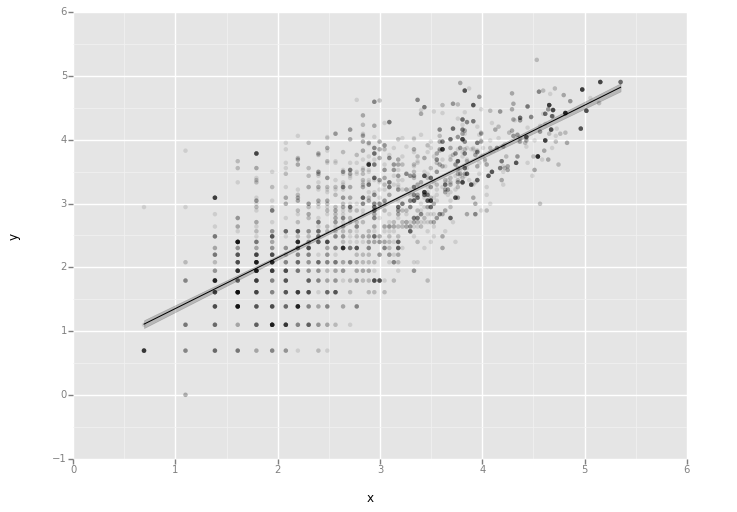

<ggplot: (-9223372036533214930)>

In [114]:
# Scatterplot with log scaling (caution: look at if there are non-positive value before attempt!):
df['x']=np.log(df['pages_viewed'] +1)
df['y']=np.log(df['duration'] +1)
dis = ggplot(df, aes('x', 'y'))
dis + geom_point(alpha = 0.1) + stat_smooth(span = 0.2) 

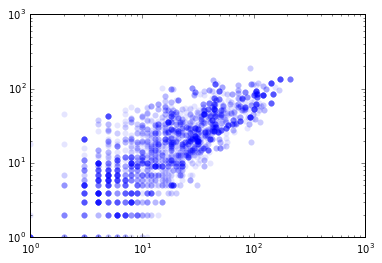

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = plt.gca()
ax.plot(df['pages_viewed'], df['duration'], 'o', c='blue', alpha=0.1, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')

#plt.scatter(df['pages_viewed'], df['duration'], c='blue', alpha=0.05, edgecolors='none')